In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from random import randint

Using TensorFlow backend.


In [16]:
num_classes = 10
batch = 1024
epochs = 20

#### Cargamos los datos del MNIST DATASET

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Plot de una imagen

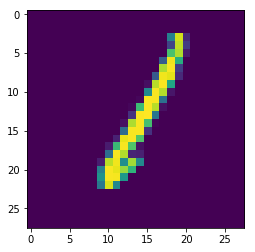

In [4]:
plt.imshow(x_train[randint(0,x_train.shape[0])])

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
x_train[0].shape

(28, 28)

##### Hacemos one hot encoding del target

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], x_test.shape[2],1)

In [9]:
x_train[0].shape

(28, 28, 1)

In [10]:
input_shape = (x_train.shape[1], x_train.shape[2],1)

In [11]:
input_shape

(28, 28, 1)

#### Generamos nuestro modelo

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train,
          batch_size=batch,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 34s 564us/step - loss: 0.3198 - acc: 0.9020 - val_loss: 0.1469 - val_acc: 0.9588
Epoch 2/20
60000/60000 [==============================] - 34s 560us/step - loss: 0.2101 - acc: 0.9367 - val_loss: 0.1060 - val_acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 33s 554us/step - loss: 0.1685 - acc: 0.9493 - val_loss: 0.0795 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 36s 597us/step - loss: 0.1428 - acc: 0.9568 - val_loss: 0.0665 - val_acc: 0.9788
Epoch 5/20
60000/60000 [==============================] - 33s 555us/step - loss: 0.1207 - acc: 0.9636 - val_loss: 0.0654 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 35s 584us/step - loss: 0.1068 - acc: 0.9676 - val_loss: 0.0523 - val_acc: 0.9835
Epoch 7/20
60000/60000 [==============================] - 33s 557us/step - loss: 0.0984 - acc: 0.9707 - val_loss: 0.

In [18]:
model.save("model.h5")

#### Guardamos el model en tensorflowJS format

In [19]:
import tensorflowjs as tfjs

In [20]:
tfjs.converters.save_keras_model(model, ".")